In [1]:
#import warnings
#warnings.filterwarnings('ignore')

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
df=pd.read_excel('C:/Users/Emilio EG/Documents/ITAM/CIC19/datos/Estados/Caracteristicas_estados.xlsx')
df2=df[df['Estado']!='Ciudad de México']
df2=df2[df['Estado']!='México']
df2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Estado,poblacion,pib_18,pib_mineria,pib_ajustado,pib_pc_18,pib_turismo,turismo_pct,turismo_adj,dens_pob_15,...,hogares,carencia_salud,salud_pct,escolaridad,tasa_informal,letalidad,mortalidad,contagios,probit1,probit
0,Aguascalientes,1312544,224807,691,224116,170749.323451,4396,0.019555,0.019615,233.700000,...,9017,1035,0.114783,9.725975,41.271800,0.062754,14.094766,224.601994,-0.057600,-0.05620
1,Baja California,3315766,565895,571,565324,170495.746684,11138,0.019682,0.019702,46.400000,...,11413,1886,0.165250,9.757418,37.330300,0.203266,67.948100,334.281732,0.045800,0.04570
2,Baja California Sur,712029,173047,4887,168160,236170.155991,23710,0.137015,0.140997,9.600000,...,7756,834,0.107530,9.905535,38.731200,0.042083,14.184816,337.064923,-0.053100,-0.06140
3,Campeche,899931,529584,420086,109498,121673.772767,4107,0.007755,0.037508,15.600000,...,6799,792,0.116488,9.138454,62.957800,0.094537,32.113573,339.692710,-0.013100,-0.01470
4,Coahuila de Zaragoza,2954915,609051,13718,595333,201472.123564,6710,0.011017,0.011271,19.500000,...,11582,1557,0.134433,9.897388,34.784600,0.050007,12.183092,243.627989,-0.065700,-0.06780
5,Colima,711235,104475,1660,102815,144558.408965,3354,0.032103,0.032622,126.400000,...,9265,964,0.104047,9.528720,52.008100,0.115594,14.903654,128.930663,-0.005200,-0.00780
6,Chiapas,5217908,271621,5435,266186,51013.931254,5928,0.021825,0.022270,71.200000,...,7207,1261,0.174969,7.288581,71.800500,0.147838,14.220258,96.187974,0.001200,0.00620
7,Chihuahua,3556574,562599,24019,538580,151432.249125,7851,0.013955,0.014577,14.400000,...,12518,1411,0.112718,9.466591,36.912900,0.190789,20.384786,106.844396,0.050700,0.04710
9,Durango,1754754,202547,8204,194343,110752.276387,2739,0.013523,0.014094,14.200000,...,8440,1106,0.131043,9.147610,52.274000,0.066838,10.371824,155.178447,-0.042300,-0.04170
10,Guanajuato,5853677,712902,2998,709904,121274.884145,13335,0.018705,0.018784,191.300000,...,10539,1393,0.132176,8.381851,53.859800,0.047252,9.942469,210.414753,-0.074800,-0.07270


In [3]:
ye=['letalidad','mortalidad','contagios','probit']
equis=['pib_pc_18','edad_mediana_15','10_muertes_dias','dens_pob_15','camas_100mil','escolaridad']

for i in range(len(equis)):
    df2['ln_'+equis[i]]=np.log(df2[equis[i]])

In [4]:
equis2=['ln_pib_pc_18','ln_10_muertes_dias','ln_edad_mediana_15','ln_dens_pob_15','ln_camas_100mil','ln_escolaridad']
X=np.log(df2[equis2])
X['pob_urbana']=df2['pob_urbana']
X['pobre_pct']=df2['pobre_pct']
X['salud_pct']=df2['salud_pct']
X['turismo_adj']=df2['turismo_adj']
X['tasa_informal']=df2['tasa_informal']/100
X['ln_10_muertes_dias_2']=df2['ln_10_muertes_dias']**2
X = sm.add_constant(X)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
y=df2['probit']
model0 = sm.OLS(y, X).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     1.686
Date:                Wed, 22 Jul 2020   Prob (F-statistic):              0.154
Time:                        11:49:18   Log-Likelihood:                 72.507
No. Observations:                  31   AIC:                            -119.0
Df Residuals:                      18   BIC:                            -100.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5675      4.914      1.744      0.098      -1.756      18.891
ln_pib_pc_18            -0.9604      0.550     -1.746      0.098      -2.116       0.195
ln_10_muertes_dias      -7.5892      4.823     -1.574      0.133     -17.722       2.544
ln_edad_mediana_15       0.5111      0.577      0.886      0.388      -0.701       1.724
ln_dens_pob_15           0.0223      0.027      0.814      0.426      -0.035       0.080
ln_camas_100mil          0.0777      0.158      0.493      0.628      -0.254       0.409
ln_escolaridad           0.3411      0.392      0.870      0.396      -0.483       1.165
pob_urbana              -0.0575      0.087     -0.657      0.519      -0.241       0.126
pobre_pct                0.0303      0.122      0.249      0.806      -0.226       0.286
salud_pct               -0.0629      0.335     -0.187      0.853      -0.768       0.642
turismo_adj              0.1366      0.137      0.998      0.331      -0.151       0.424
tasa_informal           -0.0639      0.128     -0.499      0.624      -0.333       0.205
ln_10_muertes_dias_2     0.2097      0.127      1.656      0.115      -0.056       0.476
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.374
Skew:                           0.451   Prob(JB):                        0.503
Kurtosis:                       3.501   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
X=X.drop(columns='salud_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     1.934
Date:                Wed, 22 Jul 2020   Prob (F-statistic):             0.0997
Time:                        11:49:18   Log-Likelihood:                 72.476
No. Observations:                  31   AIC:                            -121.0
Df Residuals:                      19   BIC:                            -103.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.3624      4.667      1.792      0.089      -1.406      18.131
ln_pib_pc_18            -0.9528      0.534     -1.783      0.091      -2.071       0.166
ln_10_muertes_dias      -7.4293      4.625     -1.606      0.125     -17.109       2.251
ln_edad_mediana_15       0.5265      0.557      0.946      0.356      -0.639       1.692
ln_dens_pob_15           0.0205      0.025      0.820      0.422      -0.032       0.073
ln_camas_100mil          0.0779      0.154      0.507      0.618      -0.244       0.399
ln_escolaridad           0.3775      0.332      1.138      0.269      -0.317       1.072
pob_urbana              -0.0646      0.077     -0.840      0.412      -0.226       0.096
pobre_pct                0.0356      0.116      0.308      0.762      -0.206       0.278
turismo_adj              0.1382      0.133      1.038      0.312      -0.140       0.417
tasa_informal           -0.0691      0.122     -0.567      0.577      -0.324       0.186
ln_10_muertes_dias_2     0.2047      0.121      1.698      0.106      -0.048       0.457
==============================================================================
Omnibus:                        2.726   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.256   Jarque-Bera (JB):                1.516
Skew:                           0.488   Prob(JB):                        0.469
Kurtosis:                       3.471   Cond. No.                     2.46e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
X=X.drop(columns='pobre_pct')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     2.218
Date:                Wed, 22 Jul 2020   Prob (F-statistic):             0.0621
Time:                        11:49:18   Log-Likelihood:                 72.399
No. Observations:                  31   AIC:                            -122.8
Df Residuals:                      20   BIC:                            -107.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.7845      4.359      2.015      0.058      -0.308      17.877
ln_pib_pc_18            -1.0055      0.495     -2.033      0.056      -2.037       0.026
ln_10_muertes_dias      -7.6903      4.442     -1.731      0.099     -16.957       1.576
ln_edad_mediana_15       0.5302      0.544      0.975      0.341      -0.604       1.664
ln_dens_pob_15           0.0211      0.024      0.864      0.398      -0.030       0.072
ln_camas_100mil          0.0680      0.147      0.463      0.648      -0.238       0.374
ln_escolaridad           0.3453      0.308      1.122      0.275      -0.296       0.987
pob_urbana              -0.0646      0.075     -0.859      0.400      -0.221       0.092
turismo_adj              0.1361      0.130      1.048      0.307      -0.135       0.407
tasa_informal           -0.0528      0.107     -0.493      0.628      -0.276       0.171
ln_10_muertes_dias_2     0.2117      0.116      1.830      0.082      -0.030       0.453
==============================================================================
Omnibus:                        2.742   Durbin-Watson:                   2.137
Prob(Omnibus):                  0.254   Jarque-Bera (JB):                1.510
Skew:                           0.478   Prob(JB):                        0.470
Kurtosis:                       3.503   Cond. No.                     2.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
X=X.drop(columns='ln_camas_100mil')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     2.536
Date:                Wed, 22 Jul 2020   Prob (F-statistic):             0.0380
Time:                        11:49:18   Log-Likelihood:                 72.234
No. Observations:                  31   AIC:                            -124.5
Df Residuals:                      21   BIC:                            -110.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.0516      4.239      2.135      0.045       0.236      17.868
ln_pib_pc_18            -0.9437      0.467     -2.020      0.056      -1.915       0.028
ln_10_muertes_dias      -8.0489      4.292     -1.875      0.075     -16.974       0.876
ln_edad_mediana_15       0.5464      0.532      1.026      0.316      -0.561       1.654
ln_dens_pob_15           0.0188      0.023      0.802      0.432      -0.030       0.068
ln_escolaridad           0.3723      0.296      1.256      0.223      -0.244       0.989
pob_urbana              -0.0591      0.073     -0.812      0.426      -0.211       0.092
turismo_adj              0.1334      0.127      1.048      0.307      -0.131       0.398
tasa_informal           -0.0371      0.100     -0.372      0.714      -0.244       0.170
ln_10_muertes_dias_2     0.2205      0.112      1.969      0.062      -0.012       0.453
==============================================================================
Omnibus:                        3.461   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                2.018
Skew:                           0.491   Prob(JB):                        0.365
Kurtosis:                       3.775   Cond. No.                     2.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
X=X.drop(columns='tasa_informal')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     2.951
Date:                Wed, 22 Jul 2020   Prob (F-statistic):             0.0211
Time:                        11:49:19   Log-Likelihood:                 72.132
No. Observations:                  31   AIC:                            -126.3
Df Residuals:                      22   BIC:                            -113.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.9826      4.151      2.164      0.042       0.373      17.592
ln_pib_pc_18            -0.8258      0.336     -2.454      0.022      -1.524      -0.128
ln_10_muertes_dias      -8.1992      4.188     -1.958      0.063     -16.885       0.487
ln_edad_mediana_15       0.4572      0.466      0.981      0.337      -0.509       1.423
ln_dens_pob_15           0.0152      0.021      0.727      0.475      -0.028       0.059
ln_escolaridad           0.3889      0.287      1.354      0.189      -0.207       0.985
pob_urbana              -0.0541      0.070     -0.771      0.449      -0.200       0.091
turismo_adj              0.1180      0.118      1.000      0.328      -0.127       0.363
ln_10_muertes_dias_2     0.2243      0.109      2.053      0.052      -0.002       0.451
==============================================================================
Omnibus:                        5.019   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                3.383
Skew:                           0.643   Prob(JB):                        0.184
Kurtosis:                       3.983   Cond. No.                     2.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
X=X.drop(columns='ln_dens_pob_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     3.366
Date:                Wed, 22 Jul 2020   Prob (F-statistic):             0.0128
Time:                        11:49:19   Log-Likelihood:                 71.765
No. Observations:                  31   AIC:                            -127.5
Df Residuals:                      23   BIC:                            -116.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.8136      3.950      2.485      0.021       1.643      17.984
ln_pib_pc_18            -0.8678      0.328     -2.645      0.014      -1.546      -0.189
ln_10_muertes_dias      -8.9407      4.020     -2.224      0.036     -17.257      -0.624
ln_edad_mediana_15       0.4677      0.461      1.015      0.321      -0.486       1.421
ln_escolaridad           0.3852      0.284      1.355      0.188      -0.203       0.973
pob_urbana              -0.0491      0.069     -0.711      0.485      -0.192       0.094
turismo_adj              0.0959      0.113      0.850      0.404      -0.137       0.329
ln_10_muertes_dias_2     0.2439      0.105      2.328      0.029       0.027       0.461
==============================================================================
Omnibus:                        5.576   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                4.019
Skew:                           0.635   Prob(JB):                        0.134
Kurtosis:                       4.225   Cond. No.                     2.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
X=X.drop(columns='pob_urbana')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     3.924
Date:                Wed, 22 Jul 2020   Prob (F-statistic):            0.00714
Time:                        11:49:19   Log-Likelihood:                 71.428
No. Observations:                  31   AIC:                            -128.9
Df Residuals:                      24   BIC:                            -118.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.4095      3.868      2.433      0.023       1.427      17.392
ln_pib_pc_18            -0.9467      0.306     -3.099      0.005      -1.577      -0.316
ln_10_muertes_dias      -8.2618      3.864     -2.138      0.043     -16.238      -0.286
ln_edad_mediana_15       0.4305      0.453      0.950      0.351      -0.505       1.366
ln_escolaridad           0.3236      0.268      1.208      0.239      -0.229       0.877
turismo_adj              0.0952      0.112      0.853      0.402      -0.135       0.326
ln_10_muertes_dias_2     0.2258      0.101      2.245      0.034       0.018       0.433
==============================================================================
Omnibus:                        8.263   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.305
Skew:                           0.801   Prob(JB):                       0.0259
Kurtosis:                       4.757   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
X=X.drop(columns='turismo_adj')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     4.613
Date:                Wed, 22 Jul 2020   Prob (F-statistic):            0.00405
Time:                        11:49:19   Log-Likelihood:                 70.965
No. Observations:                  31   AIC:                            -129.9
Df Residuals:                      25   BIC:                            -121.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.4137      3.847      2.447      0.022       1.491      17.336
ln_pib_pc_18            -0.9068      0.300     -3.020      0.006      -1.525      -0.288
ln_10_muertes_dias      -8.2635      3.843     -2.150      0.041     -16.179      -0.348
ln_edad_mediana_15       0.3388      0.438      0.774      0.446      -0.563       1.240
ln_escolaridad           0.3249      0.266      1.219      0.234      -0.224       0.874
ln_10_muertes_dias_2     0.2264      0.100      2.263      0.033       0.020       0.432
==============================================================================
Omnibus:                        5.730   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.337
Skew:                           0.598   Prob(JB):                        0.114
Kurtosis:                       4.388   Cond. No.                     2.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X=X.drop(columns='ln_edad_mediana_15')

y=df2['probit']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     5.705
Date:                Wed, 22 Jul 2020   Prob (F-statistic):            0.00196
Time:                        11:49:19   Log-Likelihood:                 70.598
No. Observations:                  31   AIC:                            -131.2
Df Residuals:                      26   BIC:                            -124.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.7858      3.787      2.584      0.016       2.001      17.570
ln_pib_pc_18            -0.8947      0.298     -3.007      0.006      -1.506      -0.283
ln_10_muertes_dias      -8.3298      3.813     -2.185      0.038     -16.167      -0.493
ln_escolaridad           0.3865      0.252      1.532      0.138      -0.132       0.905
ln_10_muertes_dias_2     0.2289      0.099      2.307      0.029       0.025       0.433
==============================================================================
Omnibus:                        3.787   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                2.407
Skew:                           0.403   Prob(JB):                        0.300
Kurtosis:                       4.102   Cond. No.                     2.21e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X=X.drop(columns='ln_escolaridad')

y=df2['probit']
model1 = sm.OLS(y, X).fit()
res1=model1.summary()
pred1=model1.predict(X)
res1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 probit   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     6.499
Date:                Wed, 22 Jul 2020   Prob (F-statistic):            0.00188
Time:                        11:49:19   Log-Likelihood:                 69.258
No. Observations:                  31   AIC:                            -130.5
Df Residuals:                      27   BIC:                            -124.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.2863      3.866      2.661      0.013       2.354      18.219
ln_pib_pc_18            -0.5060      0.159     -3.176      0.004      -0.833      -0.179
ln_10_muertes_dias      -9.5134      3.826     -2.487      0.019     -17.363      -1.664
ln_10_muertes_dias_2     0.2599      0.100      2.611      0.015       0.056       0.464
==============================================================================
Omnibus:                        2.064   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                0.929
Skew:                           0.110   Prob(JB):                        0.628
Kurtosis:                       3.819   Cond. No.                     2.18e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

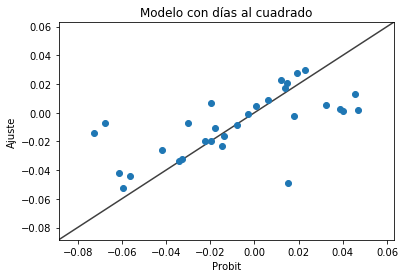

In [15]:
comparacion=pd.DataFrame(df2[['Estado','probit']])
comparacion['ajuste']=pred1

fig, ax = plt.subplots()
ax.scatter(comparacion['probit'],comparacion['ajuste'])

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
#ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

plt.title('Modelo con días al cuadrado')
plt.ylabel('Ajuste')
plt.xlabel('Probit')
plt.savefig('C:/Users/Emilio EG/Documents/ITAM/CIC19/Borradores/Regresion Probit/probitVSajuste.png',bbox_inches='tight')
plt.show()



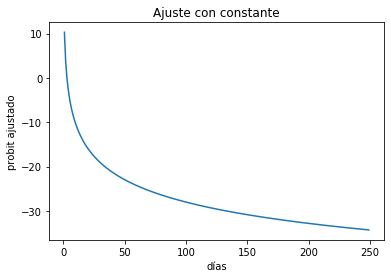

In [16]:
coef=pd.DataFrame(model1.params)

ln_dias=np.log(range(1,250))
ln_dias2=ln_dias**2
probit_adj=(coef.iloc[0,0]) + (coef.iloc[2,0]*ln_dias) + (coef.iloc[3,0]*ln_dias2)

plt.plot(range(1,250),probit_adj)
plt.xlabel('días')
plt.ylabel('probit ajustado')
plt.title('Ajuste con constante')
plt.savefig('C:/Users/Emilio EG/Documents/ITAM/CIC19/Borradores/Regresion Probit/probitVSdias.png',bbox_inches='tight')
plt.show()

In [17]:
dfoutput = summary_col([model0,model1],stars=True, model_names=['Modelo inicial', 'Modelo final'])
print(dfoutput)



                     Modelo inicial Modelo final
------------------------------------------------
const                8.5675*        10.2863**   
                     (4.9138)       (3.8660)    
ln_10_muertes_dias   -7.5892        -9.5134**   
                     (4.8230)       (3.8257)    
ln_10_muertes_dias_2 0.2097         0.2599**    
                     (0.1266)       (0.0995)    
ln_camas_100mil      0.0777                     
                     (0.1577)                   
ln_dens_pob_15       0.0223                     
                     (0.0274)                   
ln_edad_mediana_15   0.5111                     
                     (0.5772)                   
ln_escolaridad       0.3411                     
                     (0.3921)                   
ln_pib_pc_18         -0.9604*       -0.5060***  
                     (0.5500)       (0.1593)    
pob_urbana           -0.0575                    
                     (0.0875)                   
pobre_pct          

In [20]:
coef0=pd.DataFrame(model0.params)
coef0=coef0.merge(right=coef,left_index=True,right_index=True,how='outer')
coef0=coef0.fillna('')
coef0=coef0.rename(columns={'0_x':'Modelo Inicial','0_y':'Modelo Final'})
coef0

,Modelo Inicial,Modelo Final
const,8.567527,10.2863
ln_10_muertes_dias,-7.589153,-9.51336
ln_10_muertes_dias_2,0.209696,0.25987
ln_camas_100mil,0.077719,
ln_dens_pob_15,0.022338,
ln_edad_mediana_15,0.511124,
ln_escolaridad,0.341062,
ln_pib_pc_18,-0.960367,-0.506047
pob_urbana,-0.057513,
pobre_pct,0.030316,


In [19]:
var={'Variables':['Constante','ln(días desde 10 muertes)','ln(días desde 10 muertes)^2','ln(camas)','ln(densidad)','ln(edad)','ln(escolaridad)','ln(PIB)','Pob. urbana','Pobreza','Sin salud','Informalidad','Turismo']}
results=pd.DataFrame(var)
results['Modelo Inicial']=coef0['Modelo Inicial'].values
results['Modelo Final']=coef0['Modelo Final'].values
results

,Variables,Modelo Inicial,Modelo Final
0,Constante,8.567527,10.2863
1,ln(días desde 10 muertes),-7.589153,-9.51336
2,ln(días desde 10 muertes)^2,0.209696,0.25987
3,ln(camas),0.077719,
4,ln(densidad),0.022338,
5,ln(edad),0.511124,
6,ln(escolaridad),0.341062,
7,ln(PIB),-0.960367,-0.506047
8,Pob. urbana,-0.057513,
9,Pobreza,0.030316,


# Aquí empieza el reporte

In [20]:
from docx import Document
from docx.shared import Inches

In [21]:
document = Document()
document.add_heading('Resultado de la regresión sobre variables estatales',0)

document.add_heading('Tabla de resultados de la regresión', level=1)

document.add_paragraph('Variable dependiente: Coeficiente probit de los estados',style='List Bullet')

t = document.add_table(results.shape[0]+1, results.shape[1],style='LightShading')

# add the header rows.
for j in range(results.shape[-1]):
    t.cell(0,j).text = results.columns[j]

# add the rest of the data frame
for i in range(results.shape[0]):
    for j in range(results.shape[-1]):
        t.cell(i+1,j).text = str(results.values[i,j])
        
        
document.add_paragraph('Los días desde las 10 muertes representan el número de días que pasaron desde que el estado acumuló 10 muertes por COVID hasta el 12 de julio de 2020. Se utiliza el logaritmo natural de esta variable, y también el cuadrado del logaritmo para capturar mejor sus variaciones',style='List Bullet')
document.add_paragraph('camas es el logaritmo natural del número de camas hospitalarias por cada 100 mil habitantes de cada estado.',style='List Bullet')
document.add_paragraph('densidad representa la densidad de población de cada estado en 2015.',style='List Bullet')
document.add_paragraph('edad representa la edad mediana de la población de cada estado en 2015',style='List Bullet')
document.add_paragraph('escolaridad representa el grado de escolaridad promedio de la población de cada estado en 2015.',style='List Bullet')
document.add_paragraph('PIB representa el PIB per cápita de cada estado en 2018.',style='List Bullet')
document.add_paragraph('Población urbana representa el porcentaje de la población de cada estado que vivía en el área urbana en 2015.',style='List Bullet')
document.add_paragraph('Pobreza representa el porcentaje de la población de cada estado que vivía en condición de pobreza patrimonial en 2018.',style='List Bullet')
document.add_paragraph('Sin salud representa el porcentaje de la población de cada estado que no contaba con acceso a los servicios de salud en 2018.',style='List Bullet')
document.add_paragraph('Informalidad representa el porcentaje de la PEA de cada estado que trabajaba en el sector informal en 2018.',style='List Bullet')
document.add_paragraph('Turismo es el porcentaje que representa el turismo del PIB total de cada estado.',style='List Bullet')



document.add_heading('Coeficientes probit vs valores ajustados de la regresión final', level=1)

document.add_picture('C:/Users/Emilio EG/Documents/ITAM/CIC19/Borradores/Regresion Probit/probitVSajuste.png', width=Inches(5))

document.add_heading('Efecto de los días desde las 10 muertes', level=1)

document.add_paragraph('La siguiente gráfica muestra el efecto de los días que han pasado desde que los estados acumularon 10 muertes sobre el valor probit calculado con la regresión, suponiendo que ln(PIB)=0.')

document.add_picture('C:/Users/Emilio EG/Documents/ITAM/CIC19/Borradores/Regresion Probit/probitVSdias.png', width=Inches(5))

document.save('C:/Users/Emilio EG/Documents/ITAM/CIC19/Borradores/Regresion Probit/RegresionSobreProbit.docx')

C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


In [22]:
#Aquí se ven las estrellitas de los coeficientes de la regresión, no los pude poner en el documento

print(dfoutput)


                     Modelo inicial Modelo final
------------------------------------------------
const                8.5675*        10.2863**   
                     (4.9138)       (3.8660)    
ln_10_muertes_dias   -7.5892        -9.5134**   
                     (4.8230)       (3.8257)    
ln_10_muertes_dias_2 0.2097         0.2599**    
                     (0.1266)       (0.0995)    
ln_camas_100mil      0.0777                     
                     (0.1577)                   
ln_dens_pob_15       0.0223                     
                     (0.0274)                   
ln_edad_mediana_15   0.5111                     
                     (0.5772)                   
ln_escolaridad       0.3411                     
                     (0.3921)                   
ln_pib_pc_18         -0.9604*       -0.5060***  
                     (0.5500)       (0.1593)    
pob_urbana           -0.0575                    
                     (0.0875)                   
pobre_pct          